In [2]:
!pip install -q matplotlib-venn

!pip install future

In [3]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)


1.13.1


In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results
  
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


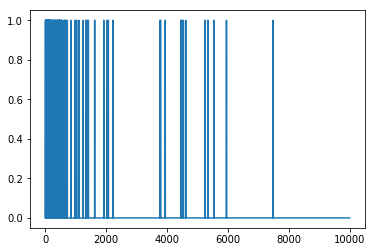

In [9]:
plt.plot(train_data[0])

In [10]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics= ['accuracy', 'binary_crossentropy'])

baseline_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)
                                   

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4926 - acc: 0.8087 - binary_crossentropy: 0.4926 - val_loss: 0.3494 - val_acc: 0.8724 - val_binary_crossentropy: 0.3494
Epoch 2/20
 - 4s - loss: 0.2596 - acc: 0.9080 - binary_crossentropy: 0.2596 - val_loss: 0.2869 - val_acc: 0.8881 - val_binary_crossentropy: 0.2869
Epoch 3/20
 - 4s - loss: 0.1900 - acc: 0.9321 - binary_crossentropy: 0.1900 - val_loss: 0.2886 - val_acc: 0.8844 - val_binary_crossentropy: 0.2886
Epoch 4/20
 - 4s - loss: 0.1542 - acc: 0.9465 - binary_crossentropy: 0.1542 - val_loss: 0.3104 - val_acc: 0.8782 - val_binary_crossentropy: 0.3104
Epoch 5/20
 - 4s - loss: 0.1277 - acc: 0.9570 - binary_crossentropy: 0.1277 - val_loss: 0.3285 - val_acc: 0.8759 - val_binary_crossentropy: 0.3285
Epoch 6/20
 - 4s - loss: 0.1075 - acc: 0.9658 - binary_crossentropy: 0.1075 - val_loss: 0.3565 - val_acc: 0.8720 - val_binary_crossentropy: 0.3565
Epoch 7/20
 - 4s - loss: 0.0901 - acc: 0.9721 - binary_crossentropy:

In [12]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4,activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics= ['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [13]:
smaller_history = smaller_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5649 - acc: 0.7717 - binary_crossentropy: 0.5649 - val_loss: 0.4478 - val_acc: 0.8579 - val_binary_crossentropy: 0.4478
Epoch 2/20
 - 3s - loss: 0.3524 - acc: 0.8921 - binary_crossentropy: 0.3524 - val_loss: 0.3417 - val_acc: 0.8788 - val_binary_crossentropy: 0.3417
Epoch 3/20
 - 3s - loss: 0.2654 - acc: 0.9144 - binary_crossentropy: 0.2654 - val_loss: 0.3048 - val_acc: 0.8853 - val_binary_crossentropy: 0.3048
Epoch 4/20
 - 3s - loss: 0.2192 - acc: 0.9279 - binary_crossentropy: 0.2192 - val_loss: 0.2897 - val_acc: 0.8876 - val_binary_crossentropy: 0.2897
Epoch 5/20
 - 3s - loss: 0.1890 - acc: 0.9385 - binary_crossentropy: 0.1890 - val_loss: 0.2852 - val_acc: 0.8873 - val_binary_crossentropy: 0.2852
Epoch 6/20
 - 3s - loss: 0.1676 - acc: 0.9467 - binary_crossentropy: 0.1676 - val_loss: 0.2875 - val_acc: 0.8857 - val_binary_crossentropy: 0.2875
Epoch 7/20
 - 3s - loss: 0.1496 - acc: 0.9530 - binary_crossentropy:

In [17]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape = (NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss= 'binary_crossentropy',
                    metrics= ['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [18]:
bigger_history = bigger_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.3416 - acc: 0.8554 - binary_crossentropy: 0.3416 - val_loss: 0.2964 - val_acc: 0.8802 - val_binary_crossentropy: 0.2964
Epoch 2/20
 - 19s - loss: 0.1423 - acc: 0.9485 - binary_crossentropy: 0.1423 - val_loss: 0.3373 - val_acc: 0.8705 - val_binary_crossentropy: 0.3373
Epoch 3/20
 - 19s - loss: 0.0469 - acc: 0.9865 - binary_crossentropy: 0.0469 - val_loss: 0.4551 - val_acc: 0.8670 - val_binary_crossentropy: 0.4551
Epoch 4/20
 - 19s - loss: 0.0074 - acc: 0.9987 - binary_crossentropy: 0.0074 - val_loss: 0.5870 - val_acc: 0.8681 - val_binary_crossentropy: 0.5870
Epoch 5/20
 - 19s - loss: 7.9189e-04 - acc: 1.0000 - binary_crossentropy: 7.9189e-04 - val_loss: 0.6799 - val_acc: 0.8695 - val_binary_crossentropy: 0.6799
Epoch 6/20
 - 19s - loss: 2.2083e-04 - acc: 1.0000 - binary_crossentropy: 2.2083e-04 - val_loss: 0.7223 - val_acc: 0.8697 - val_binary_crossentropy: 0.7223
Epoch 7/20
 - 19s - loss: 1.3123e-04 - acc: 1.

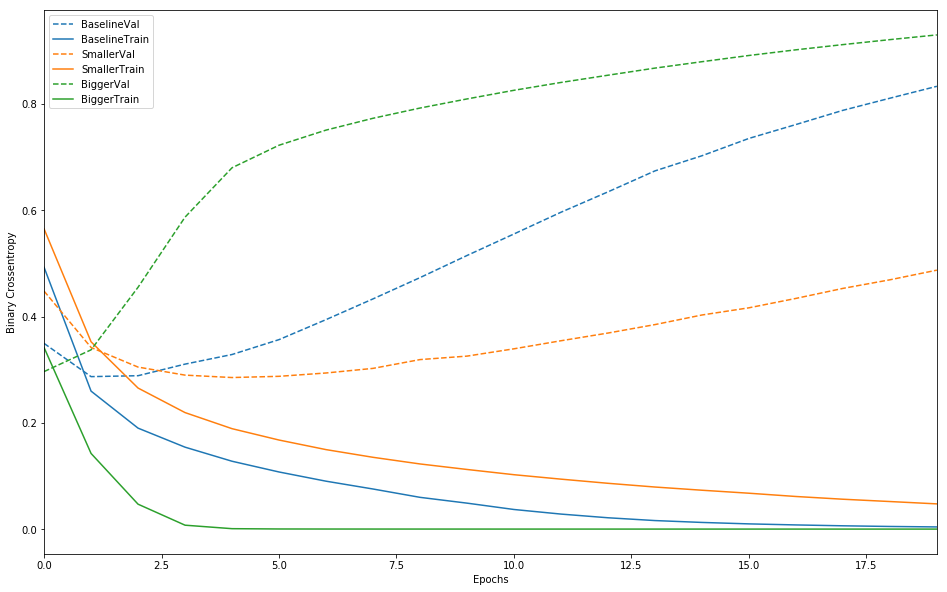

In [21]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+'Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+'Train')
    
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  
  plt.xlim([0,max(history.epoch)])
  
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [27]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer= keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer= keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer ='adam',
                loss= 'binary_crossentropy',
                metrics= ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5321 - acc: 0.8094 - binary_crossentropy: 0.4930 - val_loss: 0.3902 - val_acc: 0.8760 - val_binary_crossentropy: 0.3483
Epoch 2/20
 - 4s - loss: 0.3140 - acc: 0.9054 - binary_crossentropy: 0.2662 - val_loss: 0.3395 - val_acc: 0.8870 - val_binary_crossentropy: 0.2872
Epoch 3/20
 - 4s - loss: 0.2616 - acc: 0.9269 - binary_crossentropy: 0.2063 - val_loss: 0.3402 - val_acc: 0.8857 - val_binary_crossentropy: 0.2830
Epoch 4/20
 - 4s - loss: 0.2393 - acc: 0.9370 - binary_crossentropy: 0.1802 - val_loss: 0.3555 - val_acc: 0.8804 - val_binary_crossentropy: 0.2951
Epoch 5/20
 - 4s - loss: 0.2243 - acc: 0.9448 - binary_crossentropy: 0.1628 - val_loss: 0.3654 - val_acc: 0.8782 - val_binary_crossentropy: 0.3030
Epoch 6/20
 - 4s - loss: 0.2128 - acc: 0.9498 - binary_crossentropy: 0.1493 - val_loss: 0.3756 - val_acc: 0.8764 - val_binary_crossentropy: 0.3118
Epoch 7/20
 - 4s - loss: 0.2055 - acc: 0.9518 - binary_crossentropy:

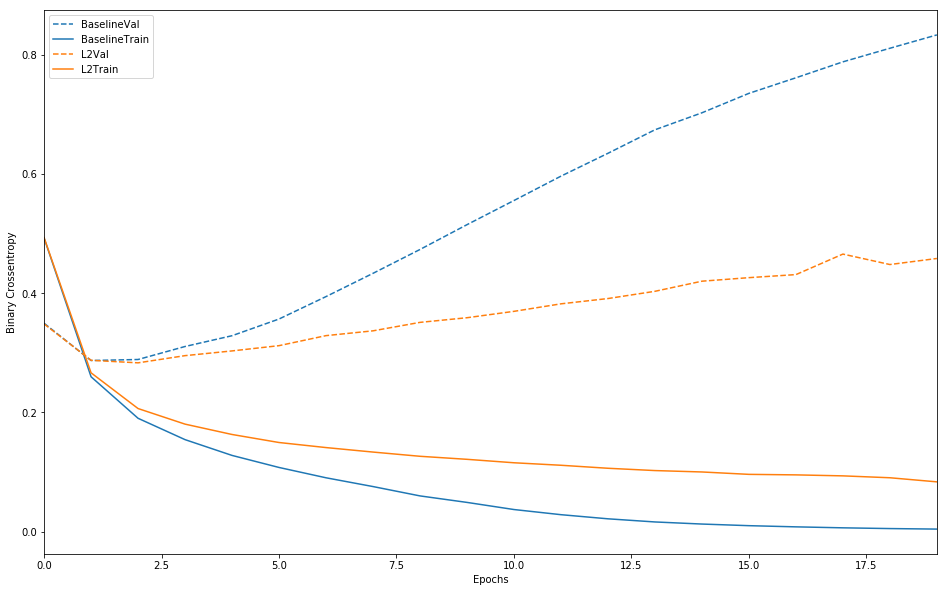

In [28]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [33]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
    
])

dpt_model.compile(optimizer='adam',
                 loss= 'binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6350 - acc: 0.6300 - binary_crossentropy: 0.6350 - val_loss: 0.5160 - val_acc: 0.8344 - val_binary_crossentropy: 0.5160
Epoch 2/20
 - 4s - loss: 0.4829 - acc: 0.7877 - binary_crossentropy: 0.4829 - val_loss: 0.3750 - val_acc: 0.8784 - val_binary_crossentropy: 0.3750
Epoch 3/20
 - 4s - loss: 0.3850 - acc: 0.8502 - binary_crossentropy: 0.3850 - val_loss: 0.3104 - val_acc: 0.8846 - val_binary_crossentropy: 0.3104
Epoch 4/20
 - 4s - loss: 0.3244 - acc: 0.8824 - binary_crossentropy: 0.3244 - val_loss: 0.2843 - val_acc: 0.8879 - val_binary_crossentropy: 0.2843
Epoch 5/20
 - 4s - loss: 0.2794 - acc: 0.9044 - binary_crossentropy: 0.2794 - val_loss: 0.2805 - val_acc: 0.8883 - val_binary_crossentropy: 0.2805
Epoch 6/20
 - 4s - loss: 0.2410 - acc: 0.9177 - binary_crossentropy: 0.2410 - val_loss: 0.2904 - val

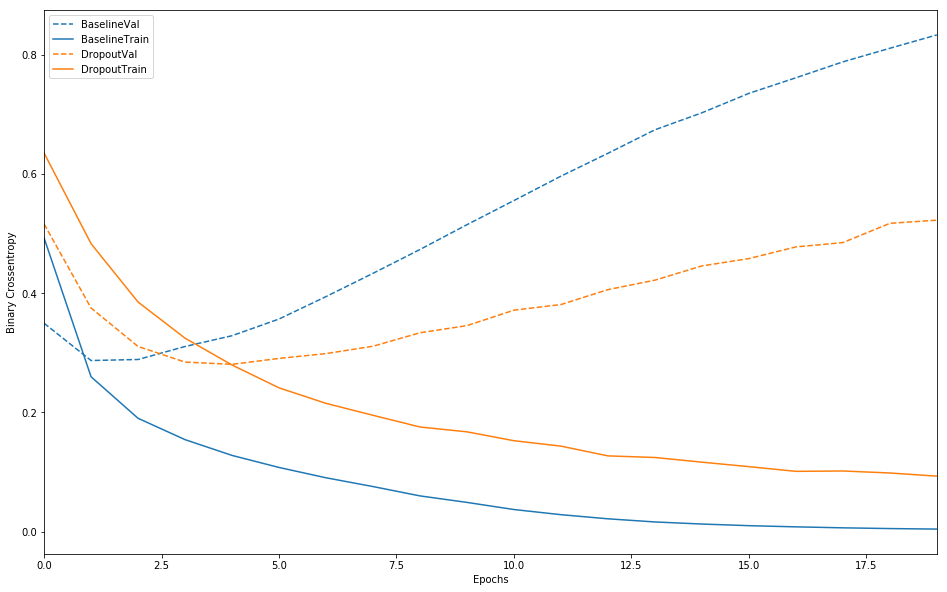

In [34]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])


To recap: here the most common ways to prevent overfitting in neural networks:

Get more training data.

Reduce the capacity of the network.

Add weight regularization.

Add dropout.

And two important approaches not covered in this guide are data-augmentation and batch normalization.